Import libraries and load the movies

In [1]:
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('../data/movies_clean.csv')

# Change some fields to the right data type
df['genres'] = df['genres'].apply(literal_eval)
df['release_date'] = pd.to_datetime(df['release_date'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424378 entries, 0 to 424377
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   adult                  424378 non-null  bool          
 1   belongs_to_collection  424378 non-null  object        
 2   budget                 424378 non-null  int64         
 3   genres                 424378 non-null  object        
 4   id                     424378 non-null  int64         
 5   original_language      424378 non-null  object        
 6   overview               424378 non-null  object        
 7   popularity             424378 non-null  float64       
 8   production_companies   424378 non-null  object        
 9   release_date           416024 non-null  datetime64[ns]
 10  revenue                424378 non-null  int64         
 11  runtime                424378 non-null  int64         
 12  spoken_languages       424378 non-null  obje

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,keywords,metadata
0,False,None,0,"[Drama, Comedy, Crime]",2,fi,Taisto Kasurinen is a Finnish coal miner whose...,11.517,['Villealfa Filmproductions'],1988-10-21,0,73,"[{'english_name': 'Finnish', 'iso_639_1': 'fi'...",Released,Ariel,6.900,189,taisto kasurinen finnish coal miner whose fath...,drama comedy crime villealfafilmproductions fi
1,False,None,0,"[Drama, Comedy]",3,fi,"An episode in the life of Nikander, a garbage ...",8.778,['Villealfa Filmproductions'],1986-10-17,0,74,"[{'english_name': 'Swedish', 'iso_639_1': 'sv'...",Released,Shadows in Paradise,7.239,203,episod life nikand garbag man involv death cow...,drama comedy villealfafilmproductions fi
2,False,None,4000000,"[Crime, Comedy]",5,en,It's Ted the Bellhop's first night on the job....,19.835,"['Miramax', 'A Band Apart']",1995-12-09,4257354,98,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Four Rooms,5.700,2256,ted bellhop first night joband hotel unusu gue...,crime comedy miramax abandapart en
3,False,None,21000000,"[Action, Crime, Thriller]",6,en,"While racing to a boxing match, Frank, Mike, J...",10.282,"['JVC', 'Largo Entertainment']",1993-10-15,12136938,109,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Judgment Night,6.569,267,race box match frank mike john rey get bargain...,action crime thriller jvc largoentertainment en
4,False,None,42000,[Documentary],8,en,Timo Novotny labels his new project an experim...,1.418,['inLoops'],2006-01-01,0,80,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Life in Loops (A Megacities RMX),7.738,21,timo novotni label new project experiment musi...,documentary inloops en


**Distribution of genres (1 movie can have many genres)** <br>
It can be seen that 'Drama' is the most popular genre.

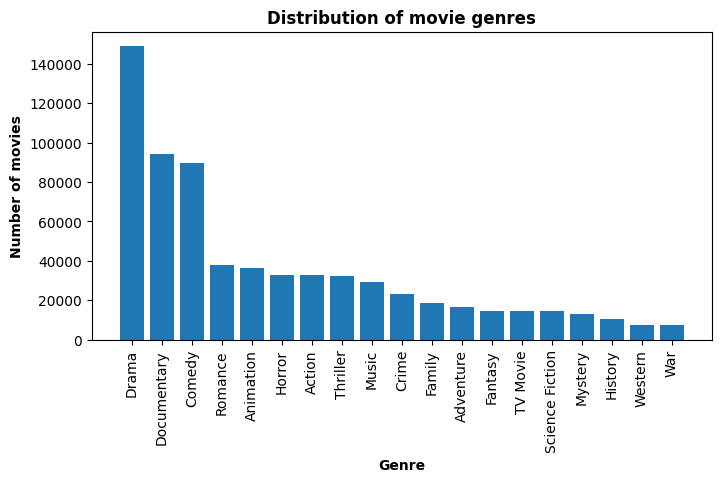

In [2]:
all_genres = []

# Iterate over each movie and append the genres to the list
for genres in df['genres']:
    for genre in genres:
        all_genres.append(genre)

# Count the number of movies for each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the genre counts as a bar chart
plt.figure(figsize=(8,4))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Number of movies', fontweight='bold')
plt.title('Distribution of movie genres', fontweight='bold')
plt.show()

**Distribution of original languages** <br>
The majority of movies in the dataset are in english.

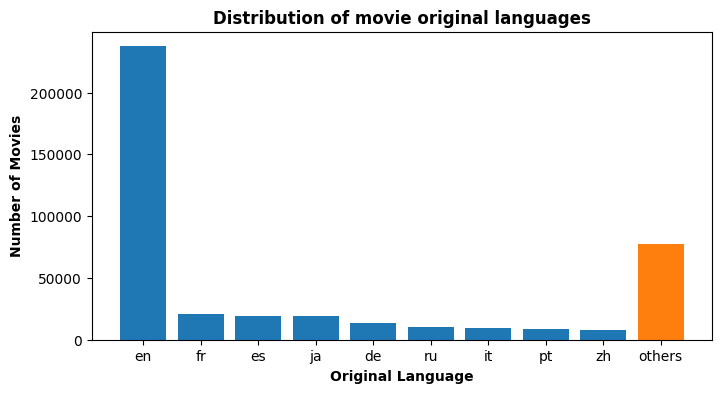

In [3]:
language_counts = df['original_language'].value_counts()

top_languages = language_counts.nlargest(9)
other_languages = language_counts.loc[~language_counts.index.isin(top_languages.index)].sum()

plt.figure(figsize=(8,4))
plt.bar(top_languages.index, top_languages.values)
plt.bar('others', other_languages)
plt.xlabel('Original Language', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')
plt.title('Distribution of movie original languages', fontweight='bold')
plt.show()

**Keywords wordcloud** <br>

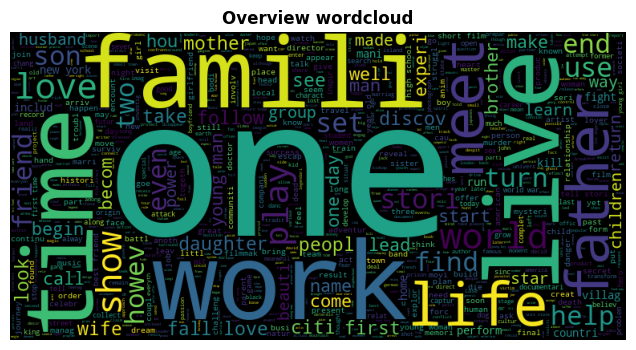

In [6]:
from wordcloud import WordCloud

df['keywords'] = df['keywords'].fillna('')

# join all the overviews into a single string
keywords_text = " ".join(review for review in df["keywords"])

# create the word cloud
wordcloud = WordCloud(background_color='black', max_words=1000, width=768, height=384)
wordcloud.generate(keywords_text)

# plot the word cloud
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Overview wordcloud', fontweight='bold')
plt.show()

**Distribution of movie release years** <br>
We can see an increase trend in the number of movie.

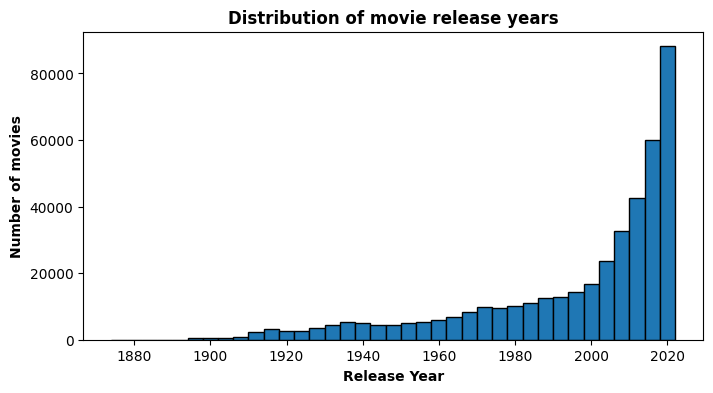

In [7]:
release_year = df['release_date'].dt.year
release_year = [int(x) for x in release_year if not np.isnan(x)]

plt.figure(figsize=(8,4))
plt.hist(release_year, bins=range(min(release_year), max(release_year)+1, 4), edgecolor='k')
plt.xlabel('Release Year', fontweight='bold')
plt.ylabel('Number of movies', fontweight='bold')
plt.title('Distribution of movie release years', fontweight='bold')
plt.show()


**Distribution of runtime** <br>
There exists some missing value of runtime (value 0). Also there are outliers which have very extreme value but actually legit (look up online).

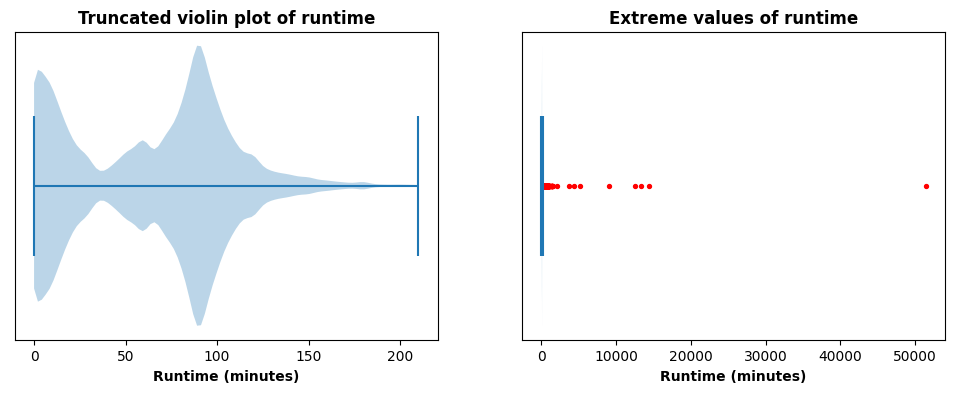

In [8]:
runtime_list = df['runtime'].copy().values

# Calculate the quartiles
q1, q3 = np.percentile(runtime_list, [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Define the thresholds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove the outliers
outliers_data = runtime_list[(runtime_list < lower_bound) | (runtime_list > upper_bound)]
filtered_data = runtime_list[(runtime_list >= lower_bound) & (runtime_list <= upper_bound)]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# truncated violin plot
ax[0].violinplot(filtered_data, vert=False)
ax[0].set_xlabel('Runtime (minutes)', fontweight='bold')
ax[0].set_title('Truncated violin plot of runtime', fontweight='bold')
ax[0].set_yticks([])

# scatter plot of extreme outliers (but legit values)
ax[1].violinplot(filtered_data, vert=False)
ax[1].scatter(outliers_data, [1]*len(outliers_data), color='red', s=8)
ax[1].set_xlabel('Runtime (minutes)', fontweight='bold')
ax[1].set_title('Extreme values of runtime', fontweight='bold')
ax[1].set_yticks([])

plt.show()

**Distribution of vote average** <br>
Nearly half of the movies in the dataset is not rated (value 0).  

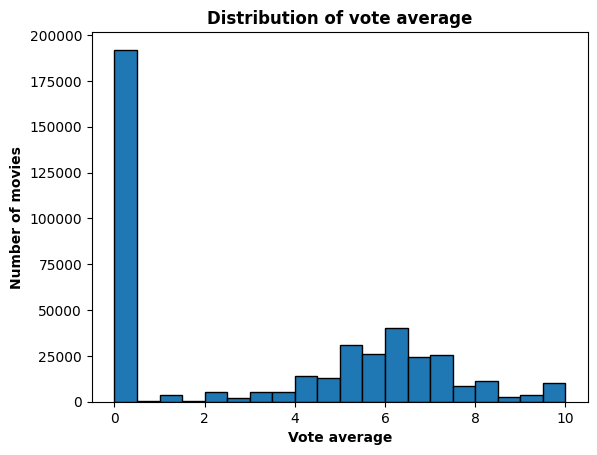

In [9]:
plt.hist(df['vote_average'], bins=20, edgecolor='k')
plt.xlabel('Vote average', fontweight='bold')
plt.ylabel('Number of movies', fontweight='bold')
plt.title('Distribution of vote average', fontweight='bold')
plt.show()

**Distribution of budget and revenue** <br>
A lot of movies are missing the budget and revenue values, which might be because of not public informations.

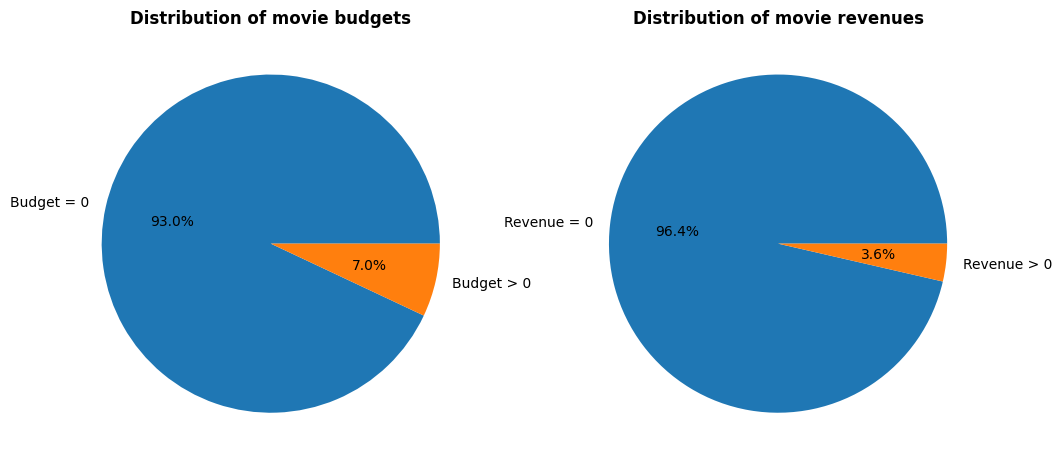

In [10]:
zero_budget = len(df[df['budget'] == 0])
non_zero_budget = len(df[df['budget'] != 0])

zero_revenue = len(df[df['revenue'] == 0])
non_zero_revenue = len(df[df['revenue'] != 0])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie([zero_budget, non_zero_budget], labels=['Budget = 0', 'Budget > 0'], autopct='%1.1f%%')
axs[0].set_title('Distribution of movie budgets', fontweight='bold')

axs[1].pie([zero_revenue, non_zero_revenue], labels=['Revenue = 0', 'Revenue > 0'], autopct='%1.1f%%')
axs[1].set_title('Distribution of movie revenues', fontweight='bold')

plt.show()

**Scatter of vote average vs vote count** <br>
For the movies with vote count more than 295, the maximum vote average is not above 8.7 (a near 8.7 average score for a movie with many votes is already very good). Whereas for the movies with less than 295 votes, the range of vote average can be from 0 to 10. 

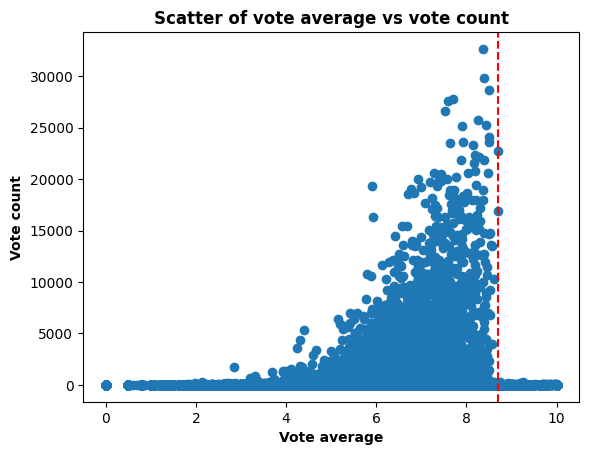

In [11]:
asymptote = max(df[df['vote_count'] > 295]['vote_average'])
plt.scatter(df['vote_average'], df['vote_count'])
plt.axvline(x=asymptote, color='red', linestyle='--')
plt.xlabel('Vote average', fontweight='bold')
plt.ylabel('Vote count', fontweight='bold')
plt.title('Scatter of vote average vs vote count', fontweight='bold')
plt.show()